# Multivariate statistics Test 3

**Student**: Aleksandr Jan Smoliakov, VU MIF Data Science MSc year 1  
**Date**: 2024-10-17

## Task 1: Probit regression

Data: File _LI_, variables

* _stflife_ (satisfaction with life: 0-extremely unsatisfied,...,10-extremely satisfied)
* _stfhlth_ (satisfaction with health system: 0-extremely unsatisfied,...,10-extremely satisfied)
* _trstprt_ (trust in political parties: 0-no trust at all,...,10-complete trust)
* _pray_: how often pray: 1-every day,..., 7- never
* _state_: 0-Israel, 1-LT

Dependent binary variable _state_, regressors _stflife_, _stfhlth_, _trstprt_, _pray_. Treat all regressors as interval variables.

Task: Perform Probit Analysis.

First of all, let's load the data and take a look.

In [1]:
import pyreadstat
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from scipy.stats import chi2
from sklearn.metrics import roc_curve

pd.options.display.float_format = '{:.4f}'.format


df_state, metadata_state = pyreadstat.read_sav("LI.sav")

df_state.describe()

,stflife,stfedu,stfhlth,pray,trstplc,trstprt,state
count,413.0000,413.0000,413.0000,413.0000,397.0000,381.0000,413.0000
mean,5.7942,4.0605,4.7361,4.8886,5.5390,2.4016,0.5569
std,2.5786,2.3137,2.6321,2.0294,2.6057,2.2778,0.4974
min,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000
25%,4.0000,2.0000,3.0000,4.0000,4.0000,0.0000,0.0000
50%,6.0000,4.0000,5.0000,5.0000,6.0000,2.0000,1.0000
75%,8.0000,6.0000,7.0000,7.0000,7.0000,4.0000,1.0000
max,10.0000,9.0000,10.0000,7.0000,10.0000,10.0000,1.0000


The dataset has six columns (_stflife_, _stfedu_, _stfhlth_, _pray_, _trstplc_, _trstprt_, _state_) and 413 rows. However, we will not be using _stfedu_ and _trstplc_ columns in this task because the task description does not mention them.

The _trstprt_ column has 32 missing values. We will remove these rows from the dataset.

In [2]:
df_state = df_state.dropna(subset=["trstprt"]).reset_index(drop=True)

df_state.describe()

,stflife,stfedu,stfhlth,pray,trstplc,trstprt,state
count,381.0000,381.0000,381.0000,381.0000,375.0000,381.0000,381.0000
mean,5.8373,4.0761,4.7585,4.8924,5.4800,2.4016,0.5617
std,2.5782,2.3095,2.6526,2.0265,2.5456,2.2778,0.4968
min,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000
25%,4.0000,2.0000,3.0000,4.0000,4.0000,0.0000,0.0000
50%,6.0000,4.0000,5.0000,5.0000,6.0000,2.0000,1.0000
75%,8.0000,6.0000,7.0000,7.0000,7.0000,4.0000,1.0000
max,10.0000,9.0000,10.0000,7.0000,10.0000,10.0000,1.0000


This has left us with 381 rows and no missing values in the relevant columns.

1. Present parameter estimates for the initial model with highlighted statistically nonsignificant variables.

We fit the initial Probit regression model using all relevant predictor variables.

In [3]:
initial_model = smf.probit("state ~ stflife + stfhlth + trstprt + pray", data=df_state).fit()

initial_model.summary2().tables[1]

Optimization terminated successfully.
         Current function value: 0.488566
         Iterations 6


,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
Intercept,1.7953,0.3129,5.7381,0.0000,1.1821,2.4085
stflife,-0.2347,0.0350,-6.6993,0.0000,-0.3034,-0.1660
stfhlth,-0.1720,0.0325,-5.2931,0.0000,-0.2357,-0.1083
trstprt,0.0284,0.0333,0.8539,0.3931,-0.0368,0.0936
pray,0.1139,0.0366,3.1071,0.0019,0.0420,0.1857


The parameter estimates for the initial model are presented above in the column `Coef.`. Their statistical significance is in the column `Pr(>|z|)`.

Not all variables are statistically significant. Statistically insignificant variables (with significance level 0.05) are:

* `trstprt` (p-value = 0.393)

We remove the statistically non-significant variable `trstprt` and fit the final Probit regression model.

In [4]:
final_model = smf.probit("state ~ stflife + stfhlth + pray", data=df_state).fit()

Optimization terminated successfully.
         Current function value: 0.489525
         Iterations 6


2. For the final model present Chi square likelihood ratio omnibus test.

In [5]:
# likelihood ratio statistic
lr_stat = -2 * (initial_model.llf - final_model.llf)
# degrees of freedom
df_diff = initial_model.df_model - final_model.df_model
# p-value
p_value = chi2.sf(lr_stat, df_diff)

print(f"Chi-square likelihood ratio test statistic: {lr_stat}")
print(f"Degrees of freedom: {df_diff}")
print(f"P-value: {p_value}")

Chi-square likelihood ratio test statistic: -0.730486049556248
Degrees of freedom: 1.0
P-value: 1.0


The p-value for our test is 1.0, which means that the final model is not statistically significantly different from the initial model. That makes sense because we only removed one non significant variable from the initial model.

3. Estimates for all variables and their statistical significance.

In [6]:
final_model.summary2().tables[1]

,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
Intercept,1.8667,0.3013,6.1964,0.0000,1.2763,2.4572
stflife,-0.2337,0.0350,-6.6848,0.0000,-0.3022,-0.1652
stfhlth,-0.1742,0.0324,-5.3747,0.0000,-0.2377,-0.1107
pray,0.1137,0.0366,3.1046,0.0019,0.0419,0.1854


The parameter estimates for the final model are presented above in the column `Coef.`. Their statistical significance is in the column `Pr(>|z|)`.

This time all variables are statistically significant.

4. Model equation.

We can present the final model equation using the parameter estimates.

In [7]:
# extract coefficients
coefficients = final_model.params
intercept = coefficients["Intercept"]
stflife_coef = coefficients["stflife"]
stfhlth_coef = coefficients["stfhlth"]
pray_coef = coefficients["pray"]

# model equation
model_equation = f"state = Φ({intercept:.4f} + {stflife_coef:.4f} * stflife + {stfhlth_coef:.4f} * stfhlth + {pray_coef:.4f} * pray)"
print(model_equation)

state = Φ(1.8667 + -0.2337 * stflife + -0.1742 * stfhlth + 0.1137 * pray)


5. Classification Table.

We can present the classification table for the final model.

In [8]:
# predict the probabilities
df_state["predicted_prob"] = final_model.predict(df_state)

# classify based on threshold=0.5
df_state["predicted_state"] = (df_state["predicted_prob"] > 0.5).astype(int)

# create the classification table
classification_table = pd.crosstab(
    df_state["state"].astype(int),
    df_state["predicted_state"],
    rownames=["Actual"],
    colnames=["Predicted"],
)
classification_table

Predicted,0,1
Actual,,
0,122,45
1,45,169


The classification table above shows there are:

* 169 true positives
* 122 true negatives
* 45 false positives
* 45 false negatives

6. Sensitivity and Specificity.

Using the classification table, we can calculate the sensitivity and specificity for the final model.

In [9]:
tn, fn = classification_table.iloc[0]
fp, tp = classification_table.iloc[1]

sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

print(f"Sensitivity: {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")

Sensitivity: 0.7897
Specificity: 0.7305


7. ROC curve.

We can also use the predicted probabilities to plot the ROC curve for the final model.

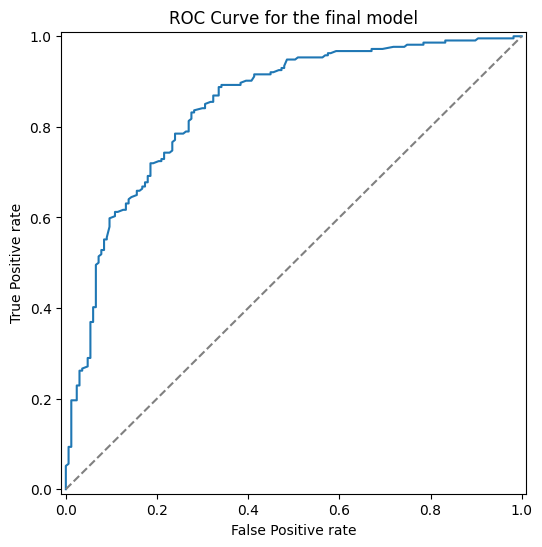

In [10]:
# calculate the ROC curve
fpr, tpr, thresholds = roc_curve(
    df_state["state"],
    df_state["predicted_prob"],
)

# plot the ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label="ROC curve")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel("False Positive rate")
plt.ylabel("True Positive rate")
plt.title("ROC Curve for the final model")
plt.show()

8. Forecast for stflife=5, stfhlth=7, trstprt = 6, pray =6 (use only variables from the final model).

Let's use the final model to forecast the state for stflife = 5, stfhlth = 7, trstprt = 6, pray = 6.

In [11]:
stflife = 5
stfhlth = 7
trstprt = 6  # trstprt is not in the final model!
pray = 6

# calculate the probability of state=1
predicted_prob = final_model.predict({"stflife": stflife, "stfhlth": stfhlth, "pray": pray})[0]
print(f"predicted_prob: {predicted_prob:.4f}")

predicted_prob: 0.5638


## Task 2: Poisson regression

Data: File _partners_, variables

* _age_: respondents age.
* _partners_: number of sexual partners last year.
* _sexeduc_: Sex education in public schools (1-Favor, 2-Oppose)
* _polviews_: 1-extremely liberal, ... 7-extremely conservative.

Task: Perform Poisson regression modeling partners by remaining variables. Results must include:

First of all, let's load the data and take a look.

In [12]:
df_partners, metadata_partners = pyreadstat.read_sav("partners.sav")

df_partners.describe()

,age,polviews,sexeduc,tvhours,partners,married
count,188.0000,188.0000,188.0000,188.0000,188.0000,188.0000
mean,37.6755,3.9894,1.1223,2.8830,1.3830,1.5957
std,14.5336,1.3641,0.3286,2.2604,1.3252,0.4921
min,19.0000,1.0000,1.0000,0.0000,0.0000,1.0000
25%,27.0000,3.0000,1.0000,2.0000,1.0000,1.0000
50%,34.0000,4.0000,1.0000,2.0000,1.0000,2.0000
75%,44.0000,5.0000,1.0000,3.2500,1.0000,2.0000
max,87.0000,7.0000,2.0000,20.0000,7.0000,2.0000


The dataset has six columns (_age_, _polviews_, _sexeduc_, _tvhours_, _partners_, _married_) and 188 rows. However, we will not be using _tvhours_ and _married_ columns in this task because the task description does not mention them.

1. Estimates for variance and mean of partners.

In [13]:
mean_partners = df_partners["partners"].mean()
variance_partners = df_partners["partners"].var()

print(f"Mean of partners: {mean_partners:.4f}")
print(f"Variance of partners: {variance_partners:.4f}")

Mean of partners: 1.3830
Variance of partners: 1.7563


2. Parameter estimates for the initial model with highlighted statistically non-significant variables.

We fit the initial Poisson regression model using all relevant predictor variables.

In [14]:
initial_model = smf.poisson("partners ~ age + sexeduc + polviews", data=df_partners).fit()

initial_model.summary2().tables[1]

Optimization terminated successfully.
         Current function value: 1.438090
         Iterations 6


,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
Intercept,2.0128,0.3482,5.7805,0.0000,1.3303,2.6952
age,-0.0207,0.0053,-3.8748,0.0001,-0.0311,-0.0102
sexeduc,-0.5512,0.2545,-2.1653,0.0304,-1.0501,-0.0523
polviews,-0.0903,0.0485,-1.8625,0.0625,-0.1854,0.0047


The parameter estimates for the initial model are presented above in the column `Coef.`. Their statistical significance is in the column `Pr(>|z|)`.

Not all variables are statistically significant. Statistically insignificant variables (with significance level 0.05) are:

* `polviews` (p-value = 0.063)

We remove the statistically non-significant variable `polviews` and fit the final Poisson regression model.

In [15]:
final_model = smf.poisson("partners ~ age + polviews", data=df_partners).fit()

Optimization terminated successfully.
         Current function value: 1.452596
         Iterations 6


3. For the final model present Chi square likelihood ratio omnibus test.

In [16]:
# likelihood ratio statistic
lr_stat = -2 * (initial_model.llf - final_model.llf)
# degrees of freedom
df_diff = initial_model.df_model - final_model.df_model
# p-value
p_value = chi2.sf(lr_stat, df_diff)

print(f"Chi-square likelihood ratio test statistic: {lr_stat}")
print(f"Degrees of freedom: {df_diff}")
print(f"P-value: {p_value}")

Chi-square likelihood ratio test statistic: -5.454461517427603
Degrees of freedom: 1.0
P-value: 1.0


The p-value for our test is 1.0, which means that the final model is not statistically significantly different from the initial model. That makes sense because we only removed one non significant variable from the initial model.

4. Estimates for all variables and their statistical significance.

In [17]:
final_model.summary2().tables[1]

,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
Intercept,1.5307,0.2645,5.7872,0.0000,1.0123,2.0491
age,-0.0219,0.0053,-4.0891,0.0000,-0.0323,-0.0114
polviews,-0.1101,0.0475,-2.3208,0.0203,-0.2031,-0.0171


The parameter estimates for the final model are presented above in the column `Coef.`. Their statistical significance is in the column `Pr(>|z|)`.

This time all variables are statistically significant.

5. Model equation.

We can present the final model equation using the parameter estimates.

In [18]:
# extract coefficients
coefficients = final_model.params
intercept = coefficients["Intercept"]
age_coef = coefficients["age"]
polviews_coef = coefficients["polviews"]

# model equation
model_equation = f"partners = exp({intercept:.4f} + {age_coef:.4f} * age + {polviews_coef:.4f} * polviews)"
print(model_equation)

partners = exp(1.5307 + -0.0219 * age + -0.1101 * polviews)


6. Forecast for age = 40, sexeduc= 1, polviews=1 (use only variables from the final model).

Let's use the final model to forecast the number of sexual partners for age = 40, sexeduc = 1, polviews = 1.

In [19]:
age = 40
sexeduc = 1  # sexeduc is not in the final model!
polviews = 1

# calculate the expected number of partners
expected_partners = final_model.predict(pd.DataFrame({"age": [age], "polviews": [polviews]}))
print(f"Forecasted number of partners: {expected_partners[0]:.4f}")

Forecasted number of partners: 1.7267
